In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression

import warnings
warnings.filterwarnings('ignore')

1. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

Линейная регрессия

In [2]:
df = fetch_california_housing()

In [3]:
X = pd.DataFrame(data=df.data, columns=df.feature_names)
Y = df.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=13)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

print(mean_squared_error(y_test, model.predict(X_test)))

0.5361651688109046


In [7]:
model.fit(X_train, y_train) 

LinearRegression()

In [8]:
model.fit_intercept = False
model.fit(X_train, y_train)

print(mean_squared_error(y_test, model.predict(X_test)))

0.6140028258130026


In [9]:
model.fit_intercept = True
model.normalize = True
model.fit(X_train, y_train)

print(mean_squared_error(y_test, model.predict(X_test)))

0.5361651688109046


In [18]:
model.normalize = False
model.n_jobs = -1
model.fit(X_train, y_train)

print(mean_squared_error(y_test, model.predict(X_test)))

0.5361651688109046


2. Попробуйте применить к той же задаче другие модели регрессии. Для каждой из них выведите визуализацию регрессии и оценку точности. Рекомендуется исследовать следующие модели:
* Метод опорных векторов
 - Без ядра
 - С гауссовым ядром
 - С полиномиальным ядром
* Метод ближайших соседей
* Многослойный перцептрон
* Дерево решений
* Другие методы:
  - Гребневую регрессию
  - Регрессию Лассо
  - Регрессию ElasticNet
  - Случайный лес
  - Беггинг

In [21]:
models = {
    "Метод опорных векторов без ядра" : LinearSVR(),
    "Метод опорных векторов с гауссовым ядром" : SVR(kernel="rbf"),
    "Метод опорных векторов с полиномиальным ядром" : SVR(kernel="poly"),
    "Метод ближайших соседей" : KNeighborsRegressor(n_neighbors=5),
    "Многослойный перцептрон" : MLPRegressor(max_iter=1000),
    "Дерево решений" : DecisionTreeRegressor(),
    "Гребневую регрессию" : Ridge(),
    "Регрессию Лассо" : Lasso(),
    "Регрессию ElasticNet" : ElasticNet(),
    "Случайный лес" : RandomForestRegressor(),
    "Беггинг" : BaggingRegressor(estimator=DecisionTreeRegressor()),
}

In [ ]:
model

Метод опорных векторов без ядра - Среднеквадратичная ошибка (MSE): 0.8680164326040221


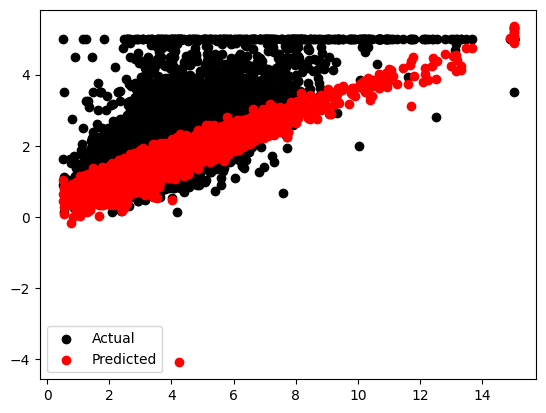

Метод опорных векторов с гауссовым ядром - Среднеквадратичная ошибка (MSE): 1.3892893040167156


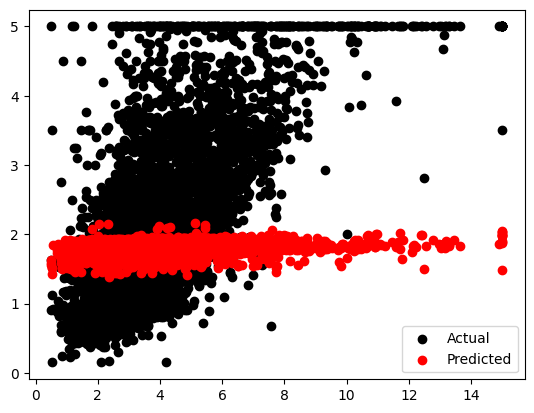

Метод опорных векторов с полиномиальным ядром - Среднеквадратичная ошибка (MSE): 1.3976266938552866


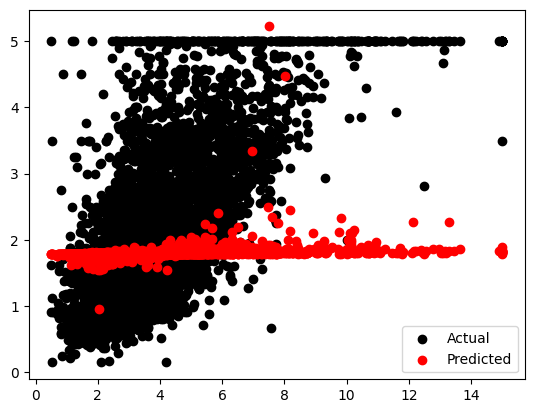

Метод ближайших соседей - Среднеквадратичная ошибка (MSE): 1.1663890788383697


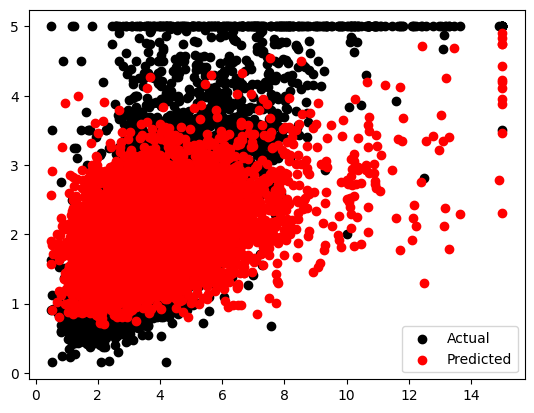

Многослойный перцептрон - Среднеквадратичная ошибка (MSE): 0.6187199189811251


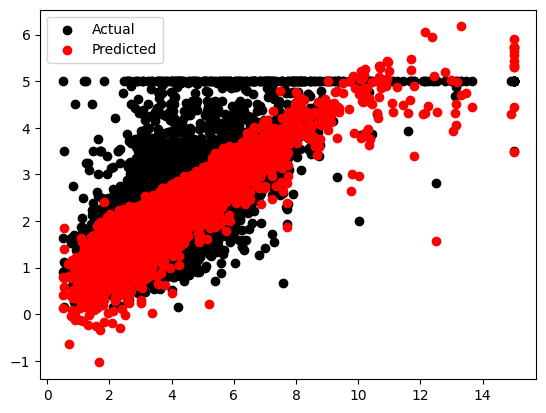

Дерево решений - Среднеквадратичная ошибка (MSE): 0.5443012864151744


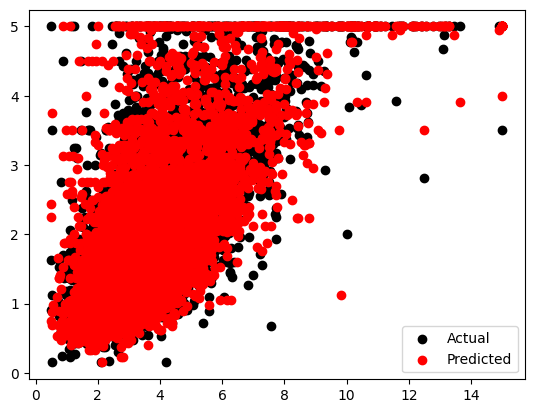

Гребневую регрессию - Среднеквадратичная ошибка (MSE): 0.5361630279678808


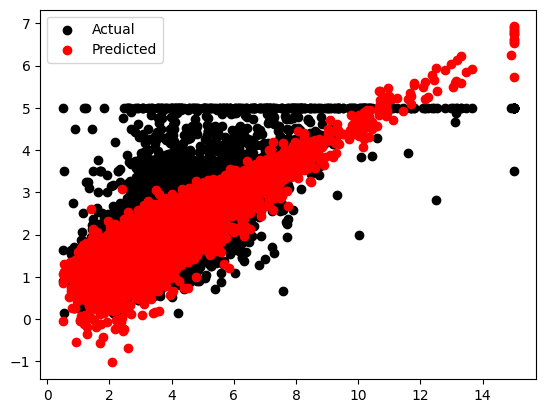

Регрессию Лассо - Среднеквадратичная ошибка (MSE): 0.9710837614037963


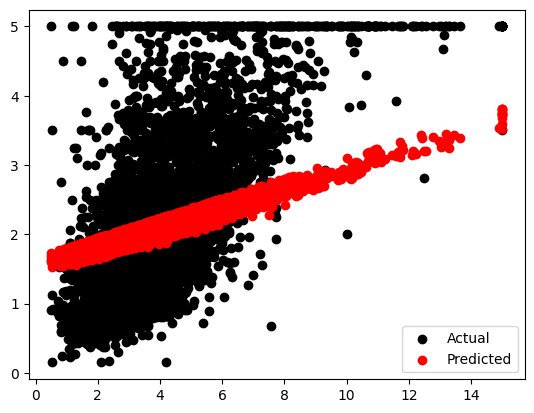

Регрессию ElasticNet - Среднеквадратичная ошибка (MSE): 0.7817029514425156


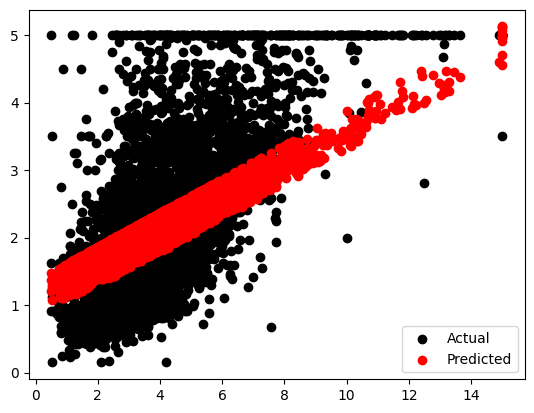

Случайный лес - Среднеквадратичная ошибка (MSE): 0.27126747029325615


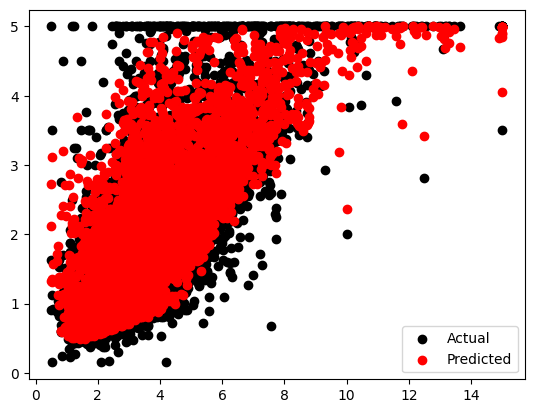

Беггинг - Среднеквадратичная ошибка (MSE): 0.2952541540234558


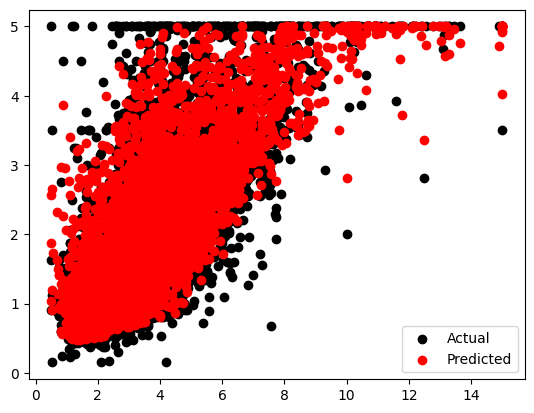

In [25]:
for name in models.keys():
    models[name].fit(X_train, y_train)

    mse = mean_squared_error(y_test, models[name].predict(X_test))
    print(f"{name} - Среднеквадратичная ошибка (MSE): {mse}")

    plt.scatter(X_test["MedInc"], y_test, color='black', label='Actual')
    plt.scatter(X_test["MedInc"], models[name].predict(X_test), color='red', label='Predicted')
    plt.legend()
    plt.show()

3. Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [26]:
def evaluate_models(dataset, models):
    X = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
    Y = dataset.target
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=13)

    results = {}
    for name in models.keys():
        models[name].fit(X_train, y_train)

        mse = mean_squared_error(y_test, models[name].predict(X_test))
        results[name] = mse

    return results

model_evaluations = evaluate_models(dataset=fetch_california_housing(), models=models)
for model, mse in model_evaluations.items():
    print(f"{model} - Среднеквадратичная ошибка (MSE): {mse}")

Метод опорных векторов без ядра - Среднеквадратичная ошибка (MSE): 0.899630167233516
Метод опорных векторов с гауссовым ядром - Среднеквадратичная ошибка (MSE): 1.3892893040167156
Метод опорных векторов с полиномиальным ядром - Среднеквадратичная ошибка (MSE): 1.3976266938552866
Метод ближайших соседей - Среднеквадратичная ошибка (MSE): 1.1663890788383697
Многослойный перцептрон - Среднеквадратичная ошибка (MSE): 0.6608291541380485
Дерево решений - Среднеквадратичная ошибка (MSE): 0.5526716780237596
Гребневую регрессию - Среднеквадратичная ошибка (MSE): 0.5361630279678808
Регрессию Лассо - Среднеквадратичная ошибка (MSE): 0.9710837614037963
Регрессию ElasticNet - Среднеквадратичная ошибка (MSE): 0.7817029514425156
Случайный лес - Среднеквадратичная ошибка (MSE): 0.2673898485662275
Беггинг - Среднеквадратичная ошибка (MSE): 0.287826113223255
